# Lending Club Case Study

### Problem Statement

The company is a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile.

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

In [314]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 111)

In [441]:
#read the dataset and check the first five rows
df0 = pd.read_csv('loan.csv')
df0.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [442]:
#Check the shape of the dataframe
df0.shape

(39717, 111)

In [443]:
df0.info(max_cols=111)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

# Data evaluation:
1. Data given shows that , lending load is primary goal. And based on that if we gonna evaluate, we have loan_status is target variable
2. From the data given it is seeing that, there are loan_status has 3 types of values, 'Fully Paid', 'Charged Off' and 'Current'.
3. Since we are not sure about 'Current' customers whether they will default or fully pay at the end of the tenure, we will filter out 'Current' customers and will only consider 'Fully Paid' and 'Charged Off' values. Here charged off means defaulters.
4. We have to find out the co relation between Funded_amt and Funded_amt_inv on target variable
5. Need to clean up data. By cheking for null values present. 
6. Few of the columns e.g. id, member id etc seems like of no use.

Lets start with cleaning up the data first



In [445]:
#Calculate missing value %
df_null_pct = df0.isnull().sum()/len(df0)*100
df_null_pct.sort_values(ascending = False)

verification_status_joint         100.000000
annual_inc_joint                  100.000000
mo_sin_old_rev_tl_op              100.000000
mo_sin_old_il_acct                100.000000
bc_util                           100.000000
bc_open_to_buy                    100.000000
avg_cur_bal                       100.000000
acc_open_past_24mths              100.000000
inq_last_12m                      100.000000
total_cu_tl                       100.000000
inq_fi                            100.000000
total_rev_hi_lim                  100.000000
all_util                          100.000000
max_bal_bc                        100.000000
open_rv_24m                       100.000000
open_rv_12m                       100.000000
il_util                           100.000000
total_bal_il                      100.000000
mths_since_rcnt_il                100.000000
open_il_24m                       100.000000
open_il_12m                       100.000000
open_il_6m                        100.000000
open_acc_6

# Data Cleaning and Manipulation
1. Missing values must be treated by dropping columns if column contains all null values
2. If missing values in rows, filter rows which are not impactful, drop them if having missing values.
3. Imputation for missing values wherever require.
4. Treating outliers


In [447]:
#Filter columns with more than or equal to 50% missing values which will be our threshold to drop the columns
df0 = df0.loc[:,df_null_pct<50]

In [448]:
# print shape of the dataframe
df0.shape

(39717, 54)

In [450]:
# List the coumns which are not required for the analysis. Total 21 columns
list_drop_col1 = ['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type']

In [454]:
# Drop the coumns which are not required for the analysis. Total 21 columns
df0.drop(list_drop_col1,axis=1,inplace = True)

In [459]:
#Observer the shape after dropping the columns
df0.shape

(39717, 33)

In [461]:
#Observe columns having single value
unique = df0.nunique()
unique.sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
int_rate                        371
zip_code                        823
loan_amnt                       885
funded_amnt                    1041
dti                            2868
annual_inc                     5318
funded_amnt_inv                8205
installment                   15383
title                       

COlumns which are having single values are not gonna helpful for analysis, lets drop them

In [464]:
#print columns with single value
list_col_unique_val = unique[unique.values==1]
list_col_unique_val

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64

In [466]:
#Drop columns having single value
cols_to_drop=list_col_unique_val.index.tolist()
df0.drop(cols_to_drop,axis=1,inplace = True)
df0.shape

(39717, 25)

#### Remove column which will not gonna add any values in analysis.
e.g. id, member_id, url, desc,zip_code

In [469]:
#drop columns which does not add any value to analysis and observe the shape
cols_drop_nouse = ["id", "member_id", "url", "desc","zip_code"]
df0.drop(cols_drop_nouse,axis=1,inplace = True)
df0.shape

(39717, 20)

As we are done with cleanup data. 
Lets do some filter on rows.

#### Filter rows to perform targeted analysis
Filter based on loan_status equal to "Charged Off" and "Fully Paid" since loan_status equal to "Current" are the customers whose loan is currently active at that point in time and does not provide concrete information whether they will turn into fully paid or charged off by the end of the loan tenure.

In [472]:
#observe the count of loan_status values
df0.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [474]:
#consider subset with values "Fully Paid" and "Charged Off" and observe the shape
df0 = df0[df0.loan_status.isin(["Fully Paid","Charged Off"])]
df0.shape

(38577, 20)

Filter out rows containing missing values more than or equal to 50%.

Check for rows with more than 50% of missing values and drop them

In [477]:
#print rows with null values in descending order
df0.isnull().sum(axis=1).sort_values(ascending=False)

28700    3
3297     2
18511    2
18729    2
18722    2
        ..
16008    0
16007    0
16006    0
16005    0
20428    0
Length: 38577, dtype: int64

In [479]:
#calculate percentage of null values across rows
df_missing_val_row = df0.isnull().sum(axis=1)/df0.shape[1]*100
print(df_missing_val_row.sort_values(ascending=False))

28700    15.0
3297     10.0
18511    10.0
18729    10.0
18722    10.0
         ... 
16008     0.0
16007     0.0
16006     0.0
16005     0.0
20428     0.0
Length: 38577, dtype: float64


In [481]:
#Identify rows with missing values greater than or equal to 50%
df_missing_val_row[df_missing_val_row>=50]

Series([], dtype: float64)

# Observation:
There are no rows with missing values >=50% Hence no need to drop any rows

Check for data inconsistencies

Drop rows if "funded_amnt_inv" is greater than "loan_amnt"

In [485]:
#drop rows if "funded_amnt_inv" is greater than "loan_amnt"
df0[df0.funded_amnt_inv > df0.loan_amnt]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,pub_rec_bankruptcies


#### "funded_amnt_inv" is greater than "loan_amnt" none of the rowa satisfied this condition

In [488]:
#Observe columns with null values
onlynull = df0.isnull().sum()
onlynull[onlynull.values>0]

emp_title               2386
emp_length              1033
title                     11
pub_rec_bankruptcies     697
dtype: int64

In [490]:
#Treating missing values for emp_title
df0["emp_title"].value_counts()

emp_title
US Army                                     131
Bank of America                             107
IBM                                          65
AT&T                                         57
Kaiser Permanente                            56
                                           ... 
amneal pharmaceuticals                        1
Net Equity Financial                          1
Kernersville Fire Department                  1
The Keith Corp. (empl by county, now Kei      1
Evergreen Center                              1
Name: count, Length: 28027, dtype: int64

In [492]:
#calculate mode
df0["emp_title"].mode()

0    US Army
Name: emp_title, dtype: object

#### Analysis: 
"emp_title" column has approx 6% missing values which can be replaced with mode since this is a categorical variable. But replacing with mode as "US Army" will not be meaningful hence we will not treat the missing values for this column.

In [495]:
#Drop column emp_title
df0.drop(["emp_title"],axis=1,inplace = True)
df0.shape

(38577, 19)

In [497]:
#Treating missing values for emp_length
df0["emp_length"].value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [499]:
#Replace null with "Self Employed"
df0["emp_length"] = df0["emp_length"].fillna("Self Employed")
df0["emp_length"].isnull().sum()

0

In [501]:
#Observe values for title column
df0.title.value_counts()

title
Debt Consolidation           2090
Debt Consolidation Loan      1620
Personal Loan                 641
Consolidation                 491
debt consolidation            478
                             ... 
Murray Loan                     1
Need debt consolidation!        1
freedom2                        1
DAVE WEDDING                    1
JAL Loan                        1
Name: count, Length: 19297, dtype: int64

Analysis: title column falls under categorical variable but the values cannot be categorized due to variations in values hence it will be difficult to carry on analysis. So we will drop this column.

In [504]:
#Drop column title
df0.drop(["title"],axis=1,inplace = True)
df0.shape

(38577, 18)

In [506]:
#Treating missing values for pub_rec_bankruptcies
df0.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    36238
1.0     1637
2.0        5
Name: count, dtype: int64

In [508]:
#Observe the null records for any inconsistency
df0[df0.pub_rec_bankruptcies.isnull()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
35006,15000,15000,14875.000000,36 months,8.94%,476.58,A,A5,< 1 year,MORTGAGE,110000.0,Not Verified,Sep-09,Fully Paid,credit_card,NY,7.07,NaN
35058,3000,3000,2988.236621,36 months,14.26%,102.92,C,C5,3 years,MORTGAGE,80800.0,Not Verified,Sep-09,Fully Paid,credit_card,TX,14.97,NaN
35362,4000,4000,3892.258856,36 months,11.14%,131.22,B,B1,< 1 year,MORTGAGE,60000.0,Not Verified,Aug-09,Charged Off,car,MI,11.08,NaN
38443,2300,2300,589.605658,36 months,13.17%,77.69,D,D2,10+ years,RENT,37152.0,Verified,Aug-08,Fully Paid,moving,NJ,2.26,NaN
38717,6000,6000,500.000000,36 months,8.00%,188.02,A,A3,< 1 year,MORTGAGE,75000.0,Not Verified,May-08,Fully Paid,other,OH,16.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.000000,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,CO,11.33,NaN
39713,8500,8500,875.000000,36 months,10.28%,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,NC,6.40,NaN
39714,5000,5000,1325.000000,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MA,2.30,NaN
39715,5000,5000,650.000000,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,MD,3.72,NaN


#### Analysis: Other values seem to be proper and we cannot predict and replace the value with mean hence we will drop such rows where pub_rec_bankruptcies is null.

In [511]:
#Filter rows with nonnull values of pub_rec_bankruptcies
df0 = df0[~df0.pub_rec_bankruptcies.isnull()]
df0.shape

(37880, 18)

In [513]:
#OBserve data
df0.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0


In [515]:
#Check data types as well
df0.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

As from datatype we can see, there is need to do some manupulation on data type so that it will help us for better data visualization

In [518]:
#Convert "funded_amnt_inv" from float 64 to int64
df0.funded_amnt_inv = df0.funded_amnt_inv.astype("int64")

In [520]:
#Convert "term" to "int64" after removing " months" string 
df0.term = df0.term.str.replace(" months",'').astype('int64')

In [522]:
#Convert "int_rate" to "float64" after removing "%" symbol.
df0.int_rate = df0.int_rate.str.replace("%",'').astype('float64')

In [524]:
#Convert "annual_inc" from float64 to int64
df0.annual_inc = df0.annual_inc.astype("int64")

In [526]:
#Convert "issue_d" to Datetime
df0.issue_d = pd.to_datetime(df0.issue_d,format = '%b-%y')

In [528]:
#Convert "pub_rec_bankruptcies" to int64
df0.pub_rec_bankruptcies = df0.pub_rec_bankruptcies.astype("int64")

In [530]:
#Check data types as well
df0.dtypes

loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                  int64
term                             int64
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                       int64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
addr_state                      object
dti                            float64
pub_rec_bankruptcies             int64
dtype: object


# Data imputation
We have corrected datatype for columns which will then help us to manage columns
and which will help us to visualize data properly

We converted : "funded_amnt_inv" to int64,
"term" to "int64" after removing " months" string,
"int_rate" to "float64",
"annual_inc" to int64,
"issue_d" to Datetime,
"pub_rec_bankruptcies" to "int64"


In [533]:
#Observe values of emp_length and Remove "+".
df0.emp_length.value_counts()

emp_length
10+ years        8369
< 1 year         4341
2 years          4207
3 years          3951
4 years          3297
5 years          3161
1 year           3077
6 years          2136
7 years          1689
8 years          1410
9 years          1209
Self Employed    1033
Name: count, dtype: int64

Lets remove + symbol from emp_length column


In [536]:
#remove '+'
df0.emp_length = df0.emp_length.str.replace("+",'')
df0.emp_length.value_counts()

emp_length
10 years         8369
< 1 year         4341
2 years          4207
3 years          3951
4 years          3297
5 years          3161
1 year           3077
6 years          2136
7 years          1689
8 years          1410
9 years          1209
Self Employed    1033
Name: count, dtype: int64

We are now done with data clean up and imputation part

Lets check for outliers now and treatment for them

In [540]:
#Observe basic statistical details about the dataset
df0.annual_inc.describe()

count    3.788000e+04
mean     6.876386e+04
std      6.357379e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.900000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

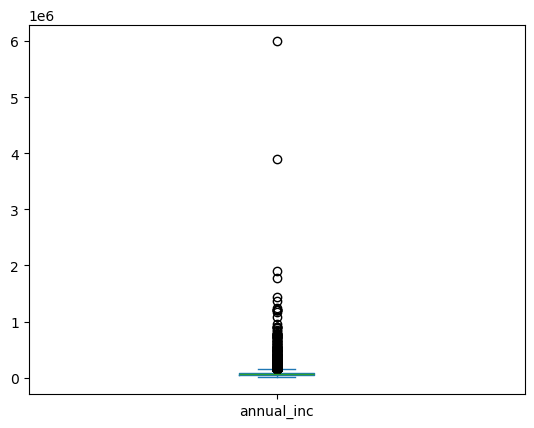

In [542]:
df0.annual_inc.plot.box()
plt.show()

Lets check , quantiles values for annual_inc. Based on that will manage condition for outliers removal


In [545]:
#Observe Quantiles
quantiles = df0.annual_inc.quantile([0.01, 0.25, 0.5, 0.75, 0.99])
quantiles

0.01     14400.0
0.25     40000.0
0.50     59000.0
0.75     82000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [547]:
#Remove outliers
df1 = df0[(df0.annual_inc > 14400) & (df0.annual_inc<234144)]

In [549]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37095 entries, 0 to 39680
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             37095 non-null  int64         
 1   funded_amnt           37095 non-null  int64         
 2   funded_amnt_inv       37095 non-null  int64         
 3   term                  37095 non-null  int64         
 4   int_rate              37095 non-null  float64       
 5   installment           37095 non-null  float64       
 6   grade                 37095 non-null  object        
 7   sub_grade             37095 non-null  object        
 8   emp_length            37095 non-null  object        
 9   home_ownership        37095 non-null  object        
 10  annual_inc            37095 non-null  int64         
 11  verification_status   37095 non-null  object        
 12  issue_d               37095 non-null  datetime64[ns]
 13  loan_status          

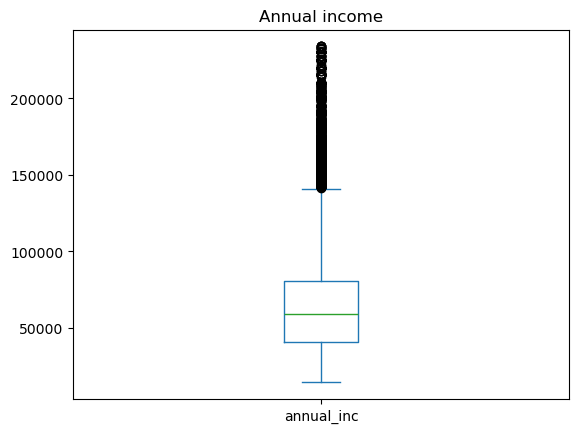

In [551]:
#Plot boxplot from new dataset after removing obvious outliers
df1.annual_inc.plot.box().set(title='Annual income')
plt.show()

As we are now done with changes for data cleanup and treatment with outliers, 
Lets start with data analysis

# Data analysis

#### Derived Metrics

1. Derived metrics for Month and Year from column "issue_d"
2. Create different groups for interest_rate
3. Instead of two different values for verification combinning them into one
4. creating annual income group



In [557]:
#Derived metrics analysis on column "issue_d"
df1["issue_y"]=df0.issue_d.dt.year
df1["issue_m"]=df0.issue_d.dt.month


In [559]:
df1[["issue_d","issue_m","issue_y"]].head()

,issue_d,issue_m,issue_y
0,2011-12-01,12,2011
1,2011-12-01,12,2011
3,2011-12-01,12,2011
5,2011-12-01,12,2011
6,2011-12-01,12,2011


### Derived metrics for "loan_amnt" to "annual_inc" ratio

In [562]:
#Calculate Loan to Amount income ratio
df1["amnt_to_inc_ratio"] = df1.loan_amnt/df1.annual_inc
df1[["loan_amnt", "annual_inc","amnt_to_inc_ratio"]]

,loan_amnt,annual_inc,amnt_to_inc_ratio
0,5000,24000,0.208333
1,2500,30000,0.083333
3,10000,49200,0.203252
5,5000,36000,0.138889
6,7000,47004,0.148923
...,...,...,...
39562,4800,35000,0.137143
39573,7000,63500,0.110236
39623,9000,39000,0.230769
39666,15450,40000,0.386250


In [564]:
#Create new column loan_status_code with 0 and 1 values based on loan_status column where 0="Charged Off" and 1="Fully Paid"
loan_status_map = {'Charged Off':1,'Fully Paid':0 }
df1["loan_status_code"] = df1["loan_status"].map(loan_status_map)
print(df1["loan_status_code"])

0        0
1        1
3        0
5        0
6        0
        ..
39562    0
39573    0
39623    1
39666    1
39680    0
Name: loan_status_code, Length: 37095, dtype: int64


In [568]:
df1.loan_status_code.value_counts()

loan_status_code
0    31728
1     5367
Name: count, dtype: int64

In [570]:
#Creating different groups for interest rate
#Int_rate is between 5% to 25%, grouping them accordingly
df1.int_rate.describe

<bound method NDFrame.describe of 0        10.65
1        15.27
3        13.49
5         7.90
6        15.96
         ...  
39562    10.28
39573    10.59
39623    12.49
39666    11.22
39680    11.86
Name: int_rate, Length: 37095, dtype: float64>

In [572]:
#Treating for int_rate
bins = [5, 9, 13, 17, 21, 25]
labels = ['5%-9%','9%-13%','13%-17%','17%-21%','21%-25%']

In [574]:
df1['int_rate_group'] = pd.cut(df1['int_rate'], bins=bins,
                               labels=labels)

df1['int_rate_group'].value_counts()

int_rate_group
9%-13%     13469
13%-17%    10680
5%-9%       9486
17%-21%     3134
21%-25%      326
Name: count, dtype: int64

In [576]:
#Combining "Source Verified" and "Verified" into "Verified"
df1["verification_status"] = df1.verification_status.str.replace("Source Verified", "Verified")

df1.verification_status.value_counts()

verification_status
Verified        21384
Not Verified    15711
Name: count, dtype: int64

In [578]:
#Treating for annual_income
bins = [ 14400, 25000, 50000, 100000,150000,234000]
labels = ['14k-25k','25k-50k','50k-100k','100k-150k','150k-250k']

df1['annual_inc_group'] = pd.cut(df1['annual_inc'], bins=bins,
                               labels=labels)
df1['annual_inc_group'].value_counts()

annual_inc_group
50k-100k     17424
25k-50k      12599
100k-150k     3925
14k-25k       2066
150k-250k     1081
Name: count, dtype: int64

## Univariate Analysis

Following fields will be checked as part of univariate analysis
Categorial variable:
#### Ordered
1. Grade
2. Sub grade
3. Term (36 / 60 months)
4. Employment length
5. Loan issue year
6. Loan issue month

#### Unordered
1. State
2. Loan purpose
3. Home Ownership
4. Loan statustusmonth

Lets plot graph for ordered categorial data

In [583]:
cols_to_plot = ["grade", "sub_grade","term","emp_length","issue_y","issue_m"]

Lets create function which can be used mutlple times to plot graph

In [586]:
#define function to plot countplot for categorical variables
def plotme(df, col_name):
    figure, axis = plt.subplots(figsize=(10,6)  , dpi=100)
    sns.countplot(x=col_name, data=df, order = df[col_name].value_counts().index)
    axis.set_xlabel(col_name)
    axis.set_ylabel('No of loans')
    axis.set_title('Plot of '+col_name , weight='bold')
    plt.xticks(rotation=90)
    
    plt.show()

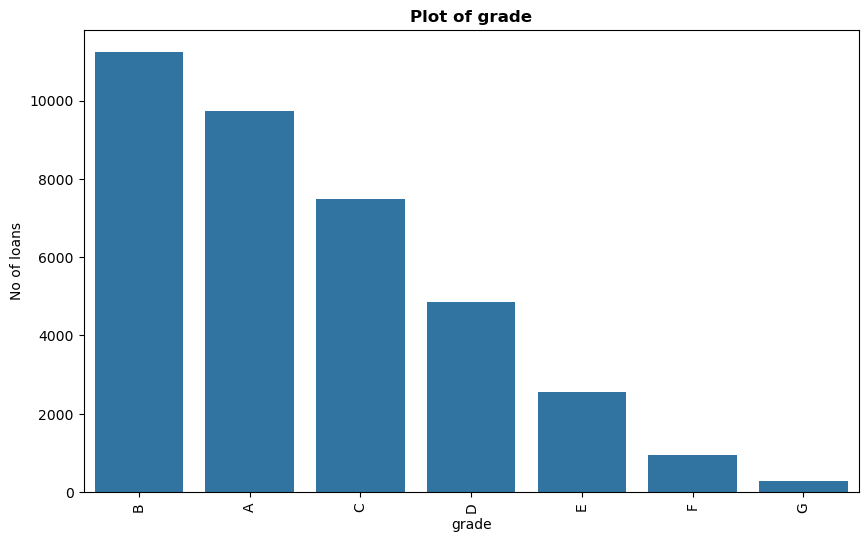

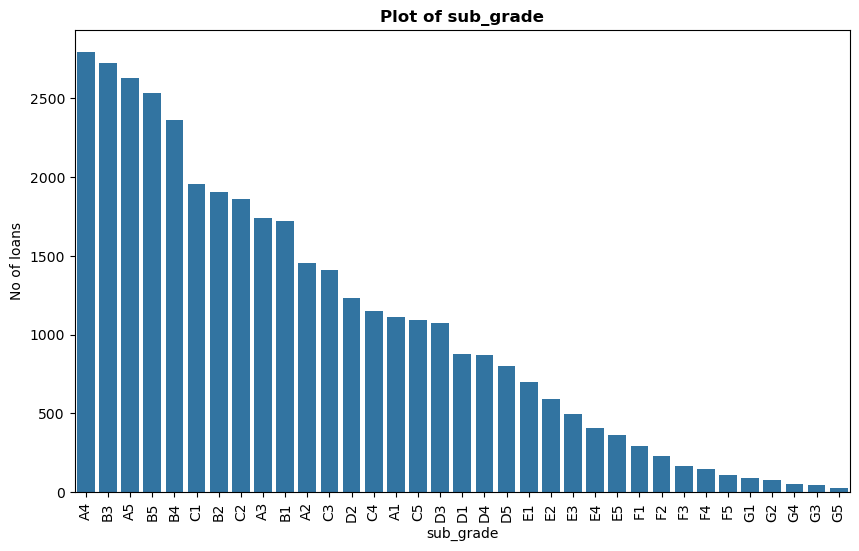

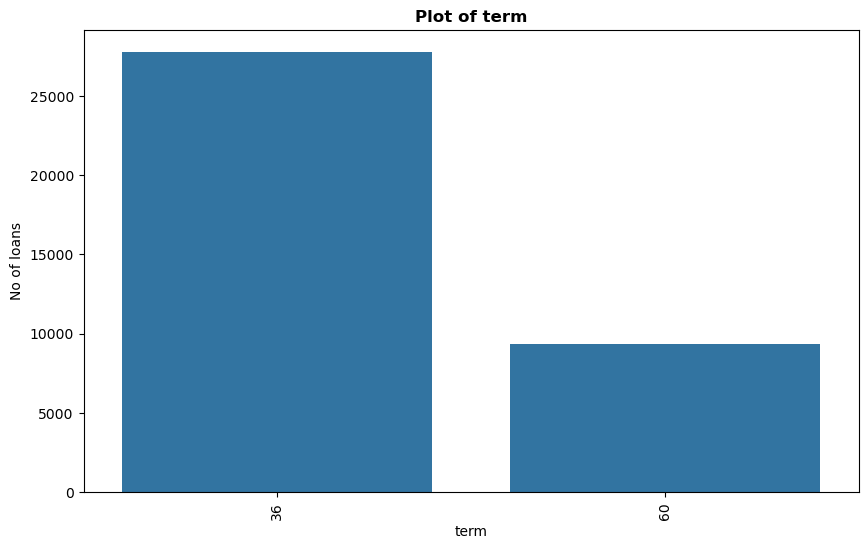

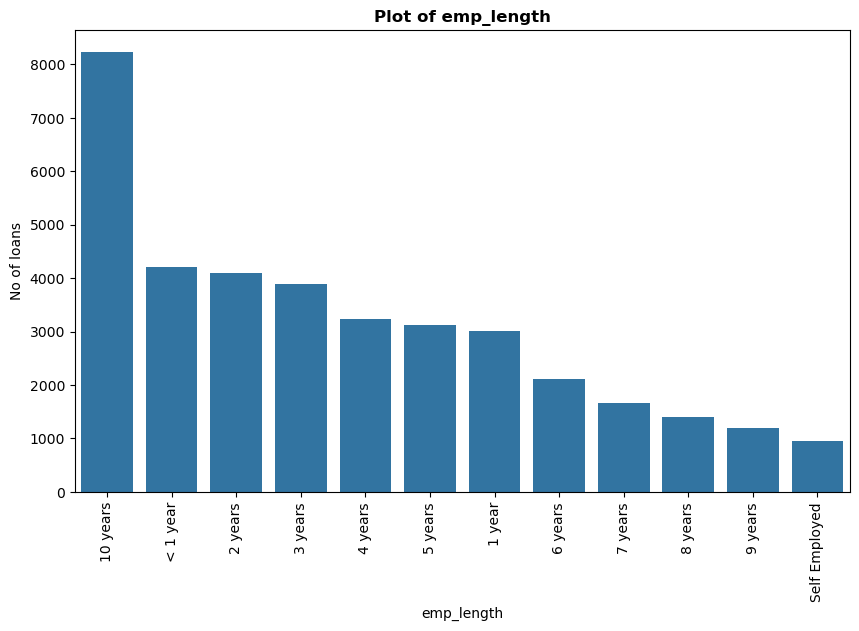

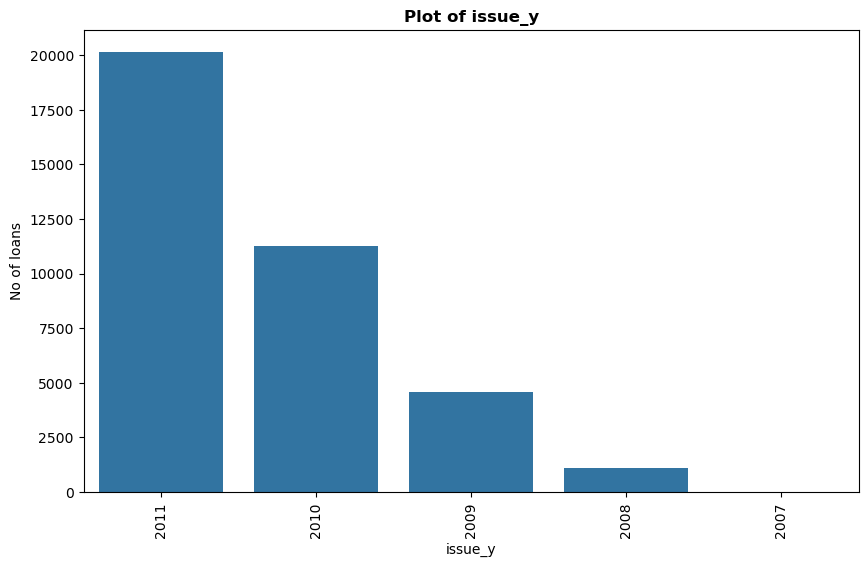

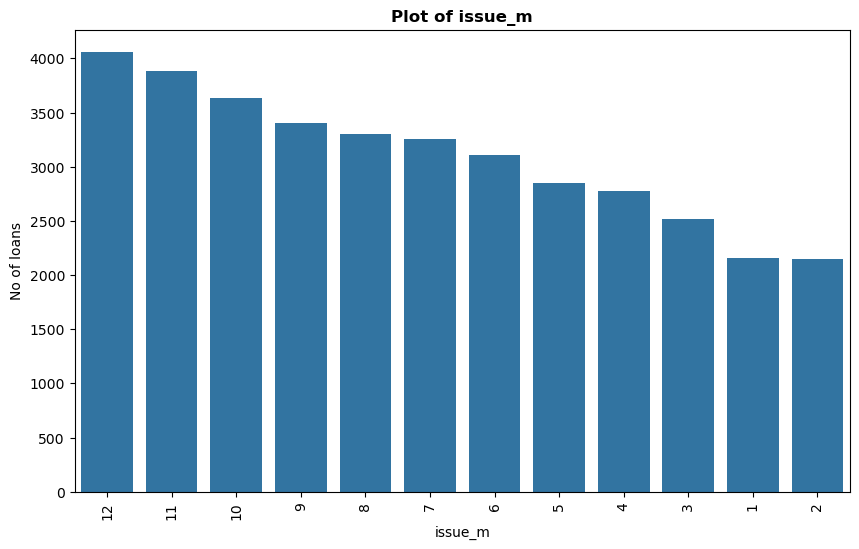

In [588]:
for col in cols_to_plot:
    plotme(df1, col)

## Obeservation from above graphs

1. Plot of Grade shows Grade A and B are given more loans compared to other grades
2. Plot of Sub Grade shows Grade A4, B3, A5, B5, B4 are given more loans compared to other grades
3. Plot of term shows 36 months loans are issued more compared to 60 months loan
4. Plot of shows employees with 10 years and above are given loan comapred with lesser experience
5. Plot of issue year shows maximum loans were taken in the year 2011. The trend is increasing with the increase in the year
6. Plot of issue month shows there is increasing trend in number of loans with increase in the months. Maximum loans were given in the month of Oct, Nov, Dec.

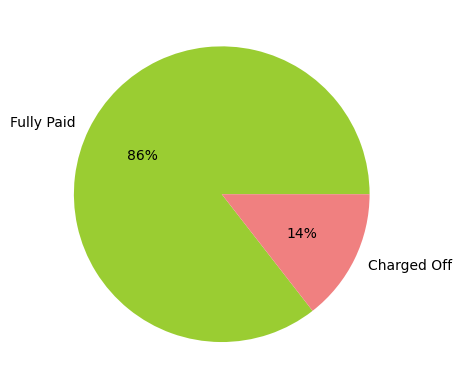

In [592]:
#Plot pie chart for loan_status
data = df1.loan_status.value_counts()
labels = ['Fully Paid','Charged Off']
colors = ['yellowgreen', 'lightcoral']
plt.pie(data, labels=labels, colors = colors, autopct = '%0.0f%%')

plt.show()

#### Observation
This shows that 14% of total loans are charged off.

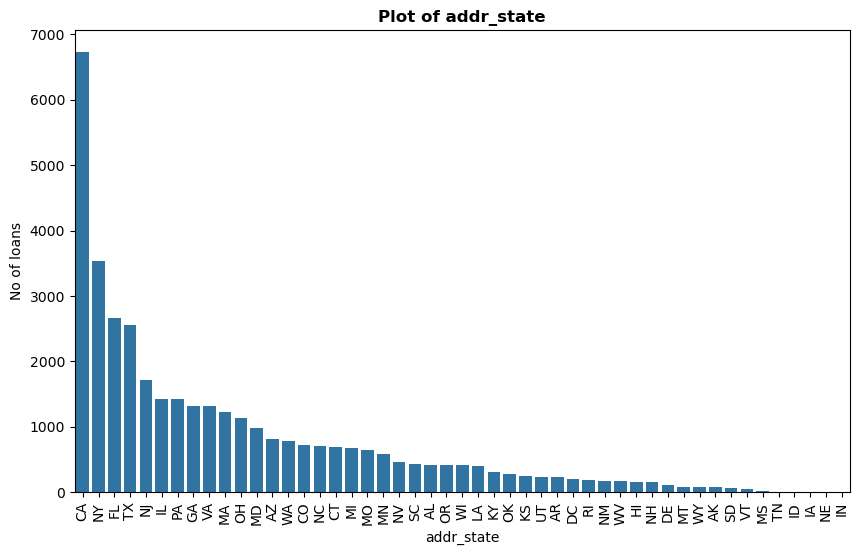

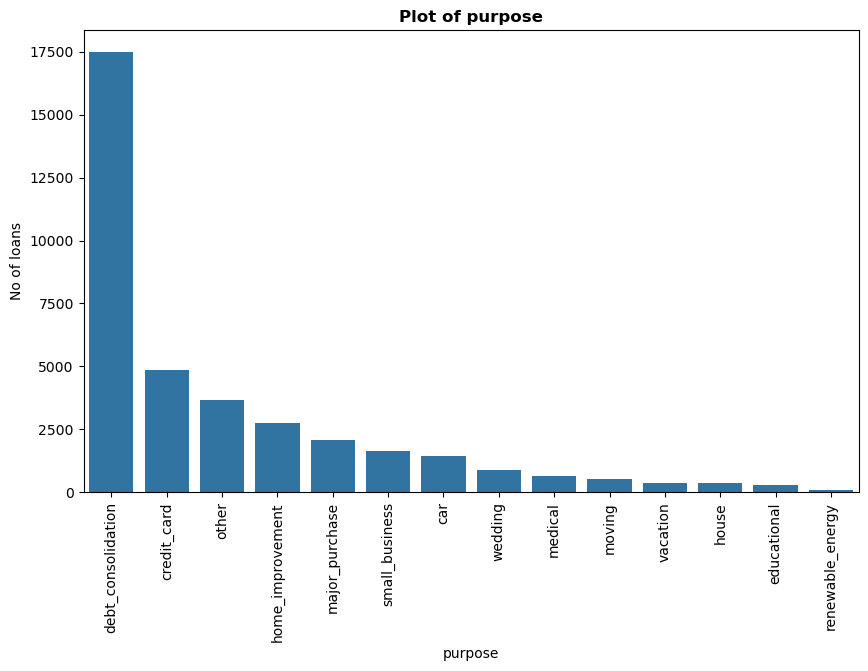

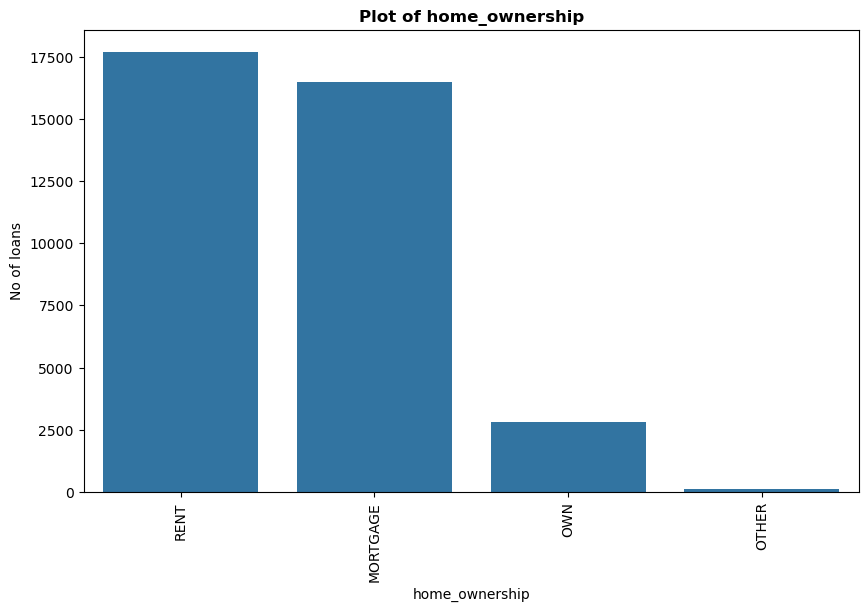

In [196]:
#Plot countplot for "addr_state", "purpose","home_ownership"
for col in ["addr_state", "purpose","home_ownership"]:
    plotme(df1, col)

#### Observation
1. States CA, NY, FL and TX are the states for which maximum loans have been issued
2. Maximum loans are given for debt consolidation, paying off Credit card and 'other' reasons
3. Education and renewable energy is the least category where loans have been given
4. People who are in Rented house or Mortgate have availed maximum loans


## Segmented Univariate Analyis

1. int_rate_group

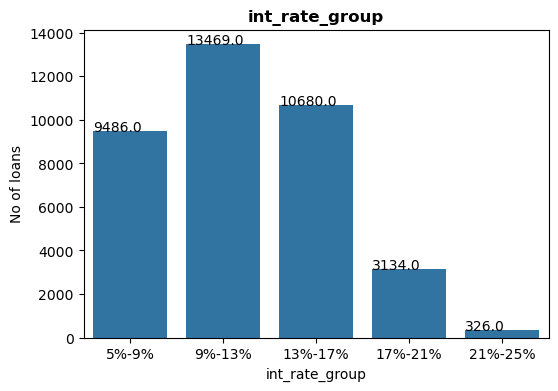

In [224]:
#Countplot of int_rate_group
fig, ax = plt.subplots(figsize=(6,4)  , dpi=100)

sns.countplot(x='int_rate_group', 
              data=df1)
 
ax.set_xlabel('int_rate_group')
ax.set_ylabel('No of loans')

ax.set_title('int_rate_group', weight='bold')
for p in ax.patches:
    ax.annotate('{:1}'.format(p.get_height()), (p.get_x(), p.get_height()+10))

plt.show()

### Observation
1. Interest rate range 9 to 13 is the range where maximum loans have been issued
2. 21 - 25% is the range where minimum loans have been issued

## Summary for univariate analysis
1. Grade A and B are given more loans compared to other grades
2. Grade A4, B3, A5, B5, B4 are given more loans compared to other grades
3. 36 months loans are issued more compared to 60 months loan
4. Employees with 10 years and above are given loan comapred with lesser experience
5. Maximum loans were taken in the year 2011. The trend is increasing with the increase in the year
6. 15 % of the total loans are charged off
7. States CA, NY, FL and TX are the states for which maximum loans have been issued
8. Maximum loans are given for debt consolidation, paying off Credit card and 'other' reasons
9. The amount to income ratio median is around 0.18; this is a good indicator
10. Interest rate range 9 to 13 is the range where maximum loans have been issued
11. 21 - 25% is the range where minimum loans have been issued

## Bivariate Analysis

#### Grade vs Loan Staus¶

#Countplot of Grade vs Loan Status
fig, ax = plt.subplots(figsize=(12,6)  , dpi=100)

sns.countplot(x='grade', hue="loan_status", 
              data=df1, 
              palette = "Set2")

ax.set_xlabel('Grade')
ax.set_ylabel('No of loans')

for p in ax.patches:
    ax.annotate('{:1}'.format(p.get_height()), (p.get_x(), p.get_height()+10))
ax.set_title('Grade vs Loan Status')

plt.show()

#### Observation¶
    Based on the counts, Grade B, C and D are top three in Charged Off

#### Sub Grade vs Loan Staus¶

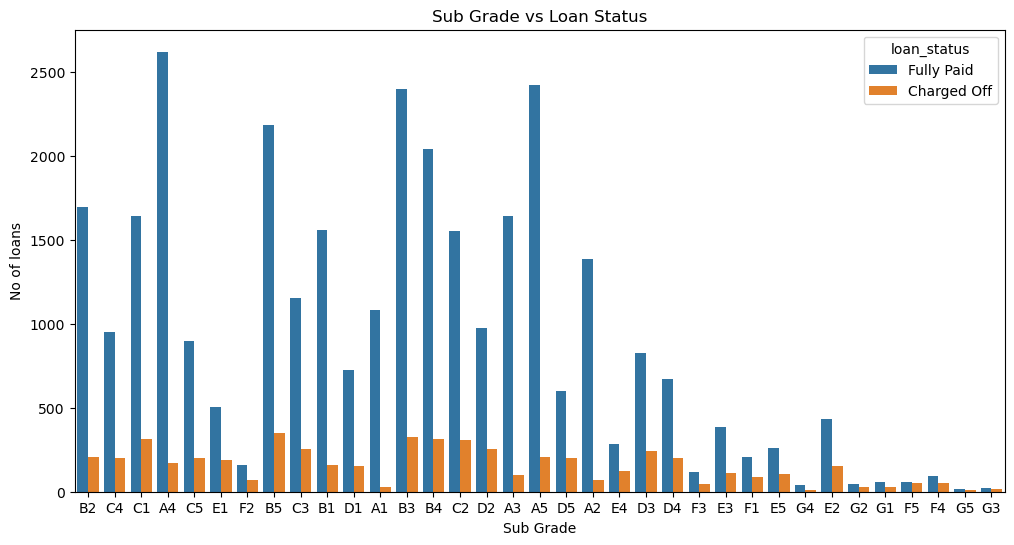

In [595]:
#Countplot of Sub Grade vs Loan Status
fig, ax = plt.subplots(figsize=(12,6)  , dpi=100)

sns.countplot(x='sub_grade', hue="loan_status", 
              data=df1)

ax.set_xlabel('Sub Grade')
ax.set_ylabel('No of loans')

ax.set_title('Sub Grade vs Loan Status')

plt.show()

Observation
Based on the counts, Grade B3,B4,B5, C1,C2, D3, D4 top sub grades in Charged Off

#### Term vs Loan Staus

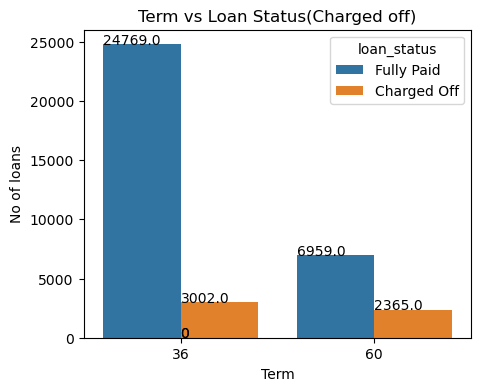

In [599]:
#Countplot of Term vs Loan Status
fig, ax = plt.subplots(figsize=(5,4)  , dpi=100)
sns.countplot(x='term',  hue="loan_status", 
              data=df1)
                  
ax.set_xlabel('Term')
ax.set_ylabel('No of loans')

for p in ax.patches:
    ax.annotate('{:1}'.format(p.get_height()), (p.get_x(), p.get_height()+10))

ax.set_title('Term vs Loan Status(Charged off)')
plt.show()

#### Observation
36 month loan default is more compared to 60 month

#### Loan Issue Month vs Loan Status

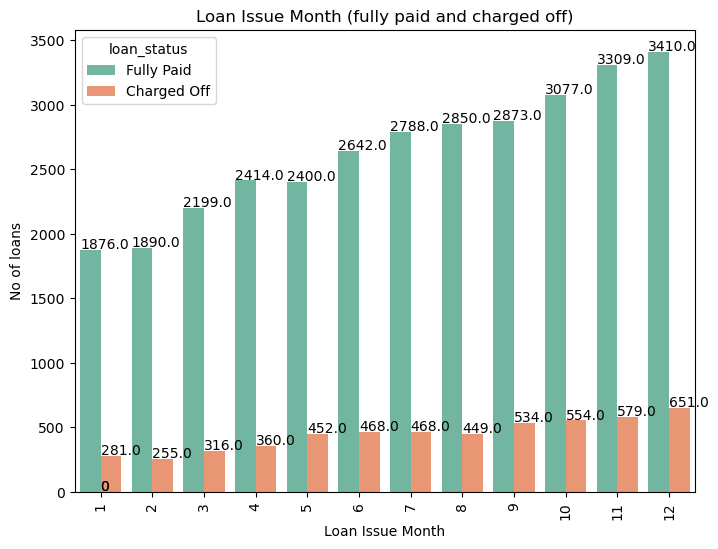

In [603]:
#Countplot of Loan Issue Month vs Loan Status
fig, ax = plt.subplots(figsize=(8,6)  , dpi=100)
plt.xticks(rotation=90)
sns.countplot(x='issue_m',
              data=df1, hue="loan_status",
              palette = "Set2")
              

ax.set_xlabel('Loan Issue Month')
ax.set_ylabel('No of loans')

for p in ax.patches:
    ax.annotate('{:1}'.format(p.get_height()), (p.get_x(), p.get_height()+10))

ax.set_title('Loan Issue Month (fully paid and charged off)')

plt.show()

#### Observation
1. Plot of the loan issue month shows maximum loans were given in the month of Oct, Nov, Dec.
2. Also high loans are being Charged Off for the loans issued in Sep - Dec months

## Bivariate Analysis - Unordered categorial data

#### Purpose vs Loan Staus

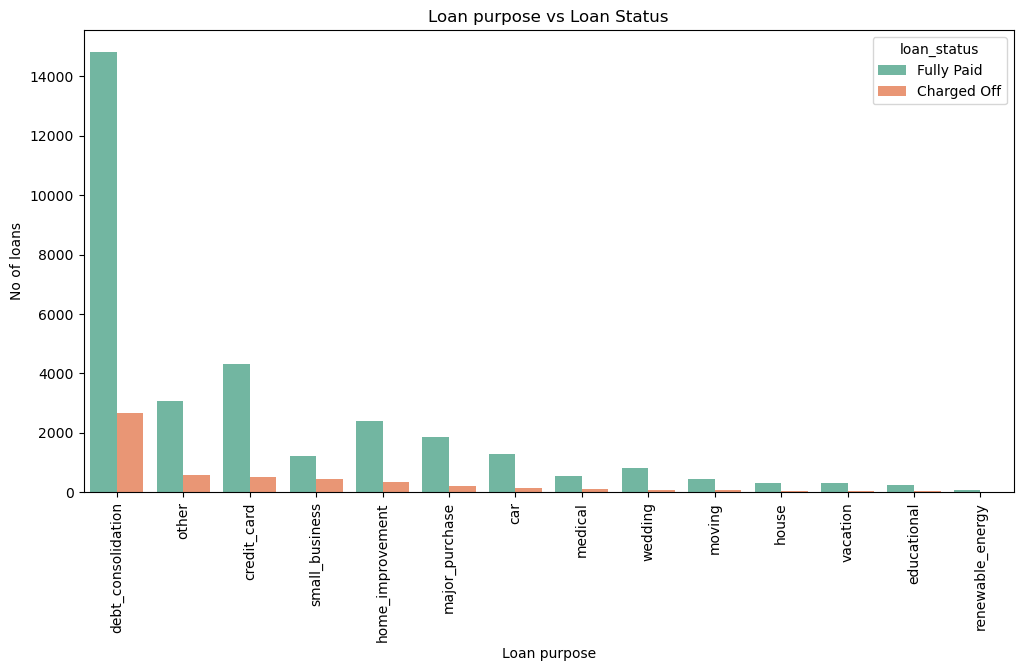

In [608]:
#Countplot of Purpose vs Loan Status
fig, ax = plt.subplots(figsize=(12,6)  , dpi=100)
plt.xticks(rotation=90)
sns.countplot(x='purpose', hue="loan_status", 
              data=df1, 
              palette = "Set2", 
              order = df1[df1.loan_status=="Charged Off"].purpose.value_counts().index)

ax.set_xlabel('Loan purpose')
ax.set_ylabel('No of loans')

ax.set_title('Loan purpose vs Loan Status')


plt.show()

#### Observation
1. Loans with purpose debt consolidation, other, credit crd and home improvement categories have failed to pay the loan compared with education / renewable energy
2. Also debt consolidation is the category where maximum loans are issued.

#### State vs Loan Staus

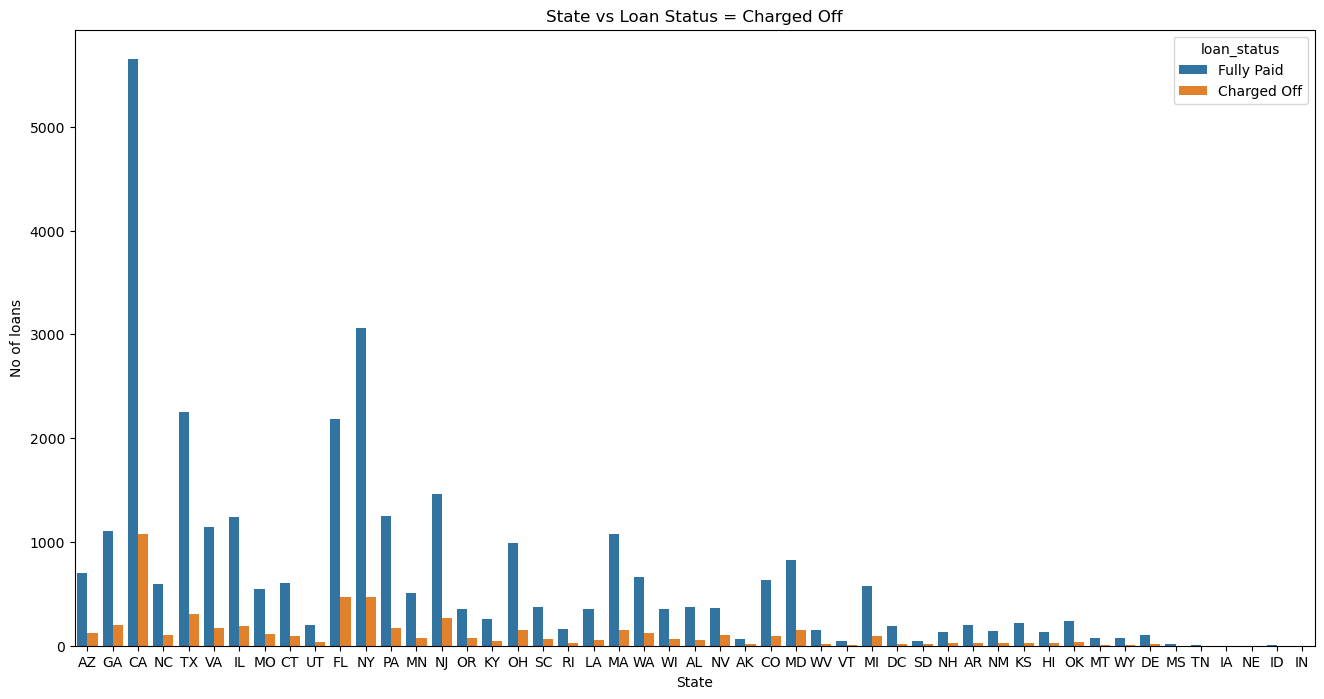

In [612]:
#Countplot of State vs Loan Status
fig, ax = plt.subplots(figsize=(16,8)  , dpi=100)

sns.countplot(x='addr_state',  hue="loan_status",
              data=df1)

ax.set_xlabel('State')
ax.set_ylabel('No of loans')

ax.set_title('State vs Loan Status = Charged Off')

plt.show()

#### Observation
1. Borrowers from states CA, FL, NY and NJ have shown maximum tendency to default.

#### Employment length vs Loan status

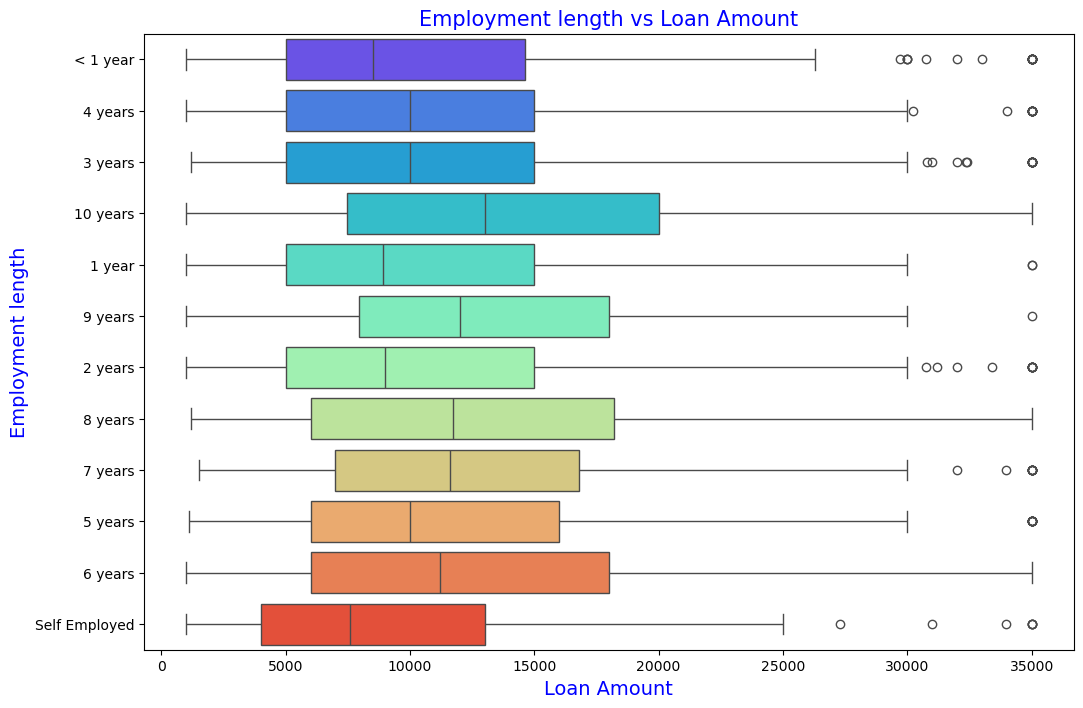

In [616]:
#Boxplot of Employment length vs Loan status
plt.figure(figsize=(12,8))
ax = sns.boxplot(y='emp_length', x='loan_amnt', data =df1[df1.loan_status=="Charged Off"],palette='rainbow')
ax.set_title('Employment length vs Loan Amount',fontsize=15,color='b')
ax.set_ylabel('Employment length',fontsize=14,color = 'b')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'b')
plt.show()

#### Observation
1. Employment length of 10 years got more loans and they are the maximum defaulters
2. Followed by year 6, 7, 8 and 9 where the medians are almost close

#### amnt_to_inc_ratio vs Loan status

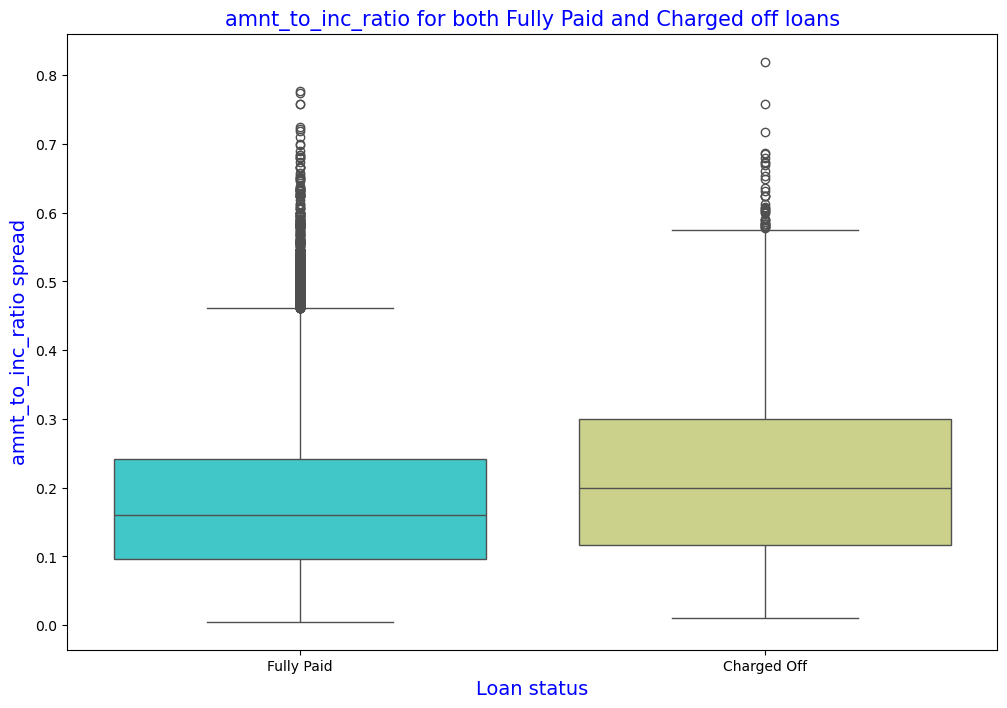

In [620]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(y='amnt_to_inc_ratio', x='loan_status', data =df1,palette='rainbow')
ax.set_title('amnt_to_inc_ratio for both Fully Paid and Charged off loans',fontsize=15,color='b')
ax.set_ylabel('amnt_to_inc_ratio spread',fontsize=14,color = 'b')
ax.set_xlabel('Loan status',fontsize=14,color = 'b')
plt.show()

#### Observation
Amnt_to_int_ratio is contributing for bad loans
This is evident looking at the box plot

### Summary 
1. Based on the counts, Grade B, C and D are top three in Charged Off
2. Based on the counts, Grade B3,B4,B5, C1,C2, D3, D4 top sub grades in Charged Off
3. 36 month loan default is more compared to 60 month
4. Maximum loans are issued for category 10 years and they are the maximum defaulters
5. Plot of loan issue year shows maximum loans were taken in the year 2011
6. Plot of the loan issue month shows maximum loans were given in the month of Oct, Nov, Dec.
7. Borrowers from states CA, FL, NY and NJ have shown maximum tendency to default.
8. People who are in Rent or Mortage have failed to pay the loan compared with people in Own house
9. State AK, MT, KY, UT, TN are marginally above the 10k level and at 13k
10. The amount of Verified loans which are Charged Off is more compared to Not Verified
11. Employment length of 10 years got more loans and they are the maximum defaulters
12. Followed by year 6, 7, 8 and 9 where the medians are almost close
looking at the box plot

# Multivariate Analysis

In [625]:
def calculate_default_perc(df,col) :
    out_deflt = pd.crosstab(df[col], df['loan_status'],margins=True)
    out_deflt['All'] = out_deflt['Charged Off'] + out_deflt['Fully Paid']
    out_deflt['Loan Default Percentage'] = round((out_deflt['Charged Off']*100/out_deflt['All']),2)
    # remove last row with sum totol
    out_deflt = out_deflt[0:-1]  
    return out_deflt

In [627]:
def plot_percentage_chart(df,col,stacked=False):
    
    plot = calculate_default_perc(df,col)
    
    display(plot)
    
    #line plot
    linePlot = plot[['Loan Default Percentage']] 
    line = linePlot.plot(figsize=(20,8), marker='o',color = 'r',lw=2)
    line.set_title(df[col].name.title()+' vs Loan Default Percentage',fontsize=20,weight="bold")
    line.set_xlabel(df[col].name.title())
    line.set_ylabel('Loan Default Percentage')
    
    #bar plot
    barPlot =  plot.iloc[:,0:3] 
    bar = barPlot.plot(kind='bar',ax = line,rot=1,secondary_y=True,stacked=stacked)
    bar.set_ylabel('Number of Loans')
    
    plt.show()

loan_status,Charged Off,Fully Paid,All,Loan Default Percentage
grade,,,,
A,575,9159,9734,5.91
B,1362,9881,11243,12.11
C,1280,6201,7481,17.11
D,1057,3801,4858,21.76
E,688,1868,2556,26.92
F,306,630,936,32.69
G,99,188,287,34.49


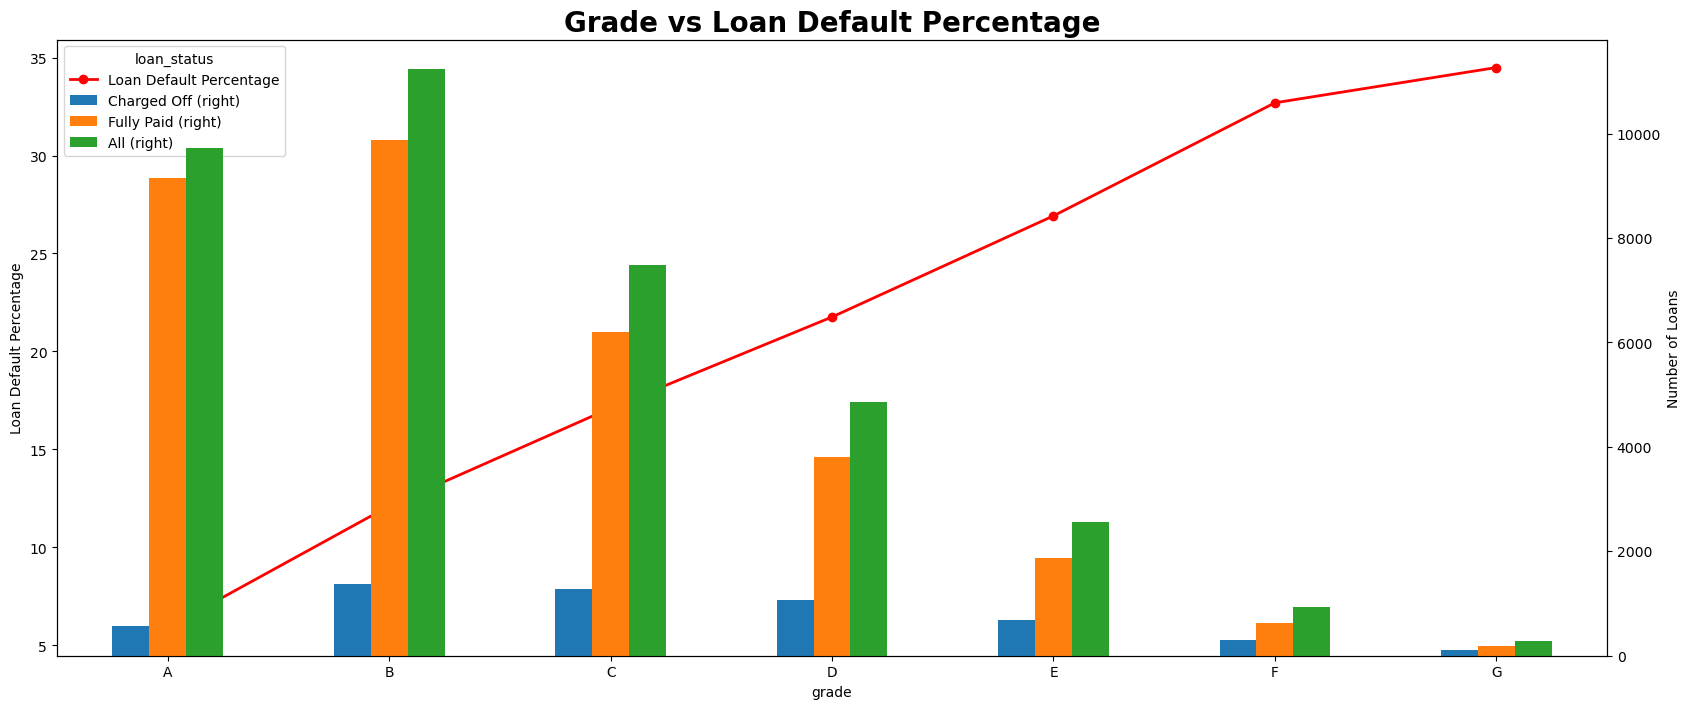

In [629]:
plot_percentage_chart(df1, 'grade',stacked=False)

#### Observation
Tendency to default the loan is increasing from Grade A to Grade G

loan_status,Charged Off,Fully Paid,All,Loan Default Percentage
home_ownership,,,,
MORTGAGE,2254,14233,16487,13.67
OTHER,18,77,95,18.95
OWN,413,2393,2806,14.72
RENT,2682,15025,17707,15.15


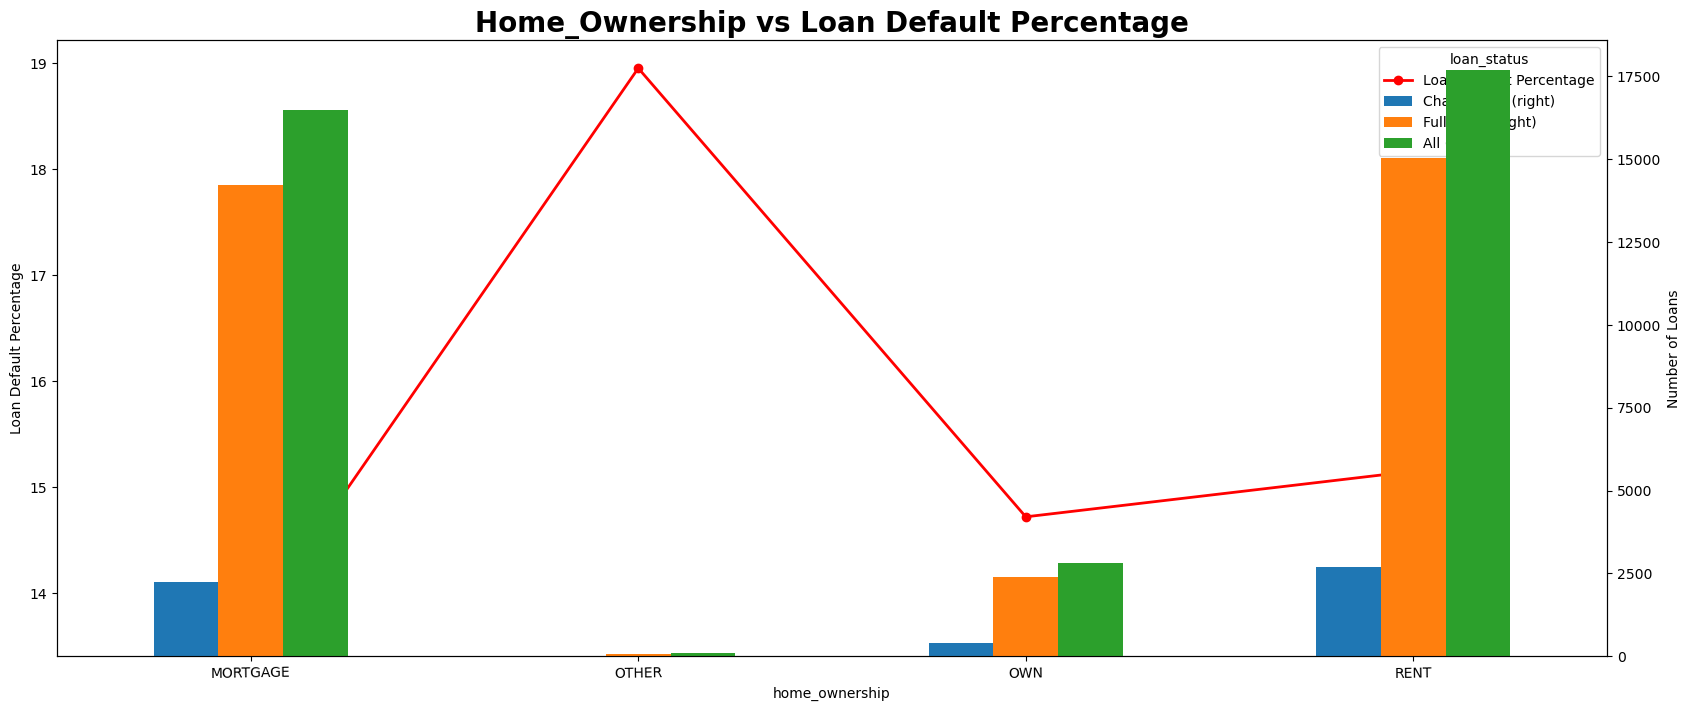

In [632]:
plot_percentage_chart(df1, 'home_ownership',stacked=False)

#### Observation
Borrowers from Other category have highest tendency to default the loan.